Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


**Мягкий дедлайн:** 6 ноября 23:59

**Жесткий дедлайн:** 13 ноября 23:59

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [0]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [0]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [0]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [0]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [0]:
age_categories = [age_category(age) for age in data.Age]

In [0]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [0]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [0]:
# Ваш код здесь
men = data.Sex[data.Sex == 'male'].count()
women = data.Sex[data.Sex == 'female'].count()
print('{} мужчин и {} женщин'.format(men, women))

577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

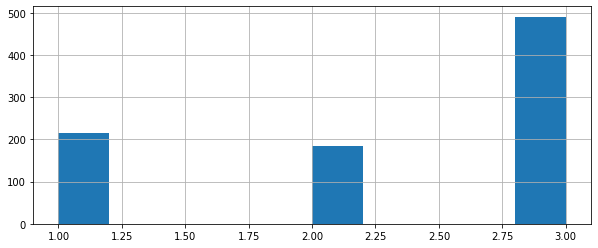

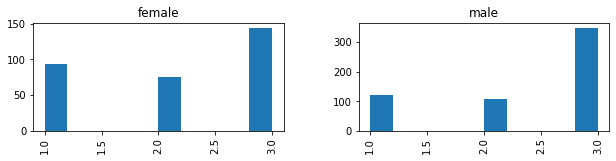

108


In [0]:
# Ваш код здесь
data.Pclass.hist(figsize=(10,4))
data.Pclass.hist(data.Sex, figsize=(10,2))
plt.show()

print(data.Sex[(data.Sex == 'male') & (data.Pclass == 2)].count())

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [0]:
# Ваш код здесь
m = round(data.Fare.median(), 2)
s = round(data.Fare.std(), 2)
print('Медиана – {}, стандартное отклонение – {}'.format(m, s))

Медиана – 14.45, стандартное отклонение – 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [0]:
# Ваш код здесь
y = data.Survived[data.Age<30]
o = data.Survived[data.Age>60]
print('{}% среди молодых и {}% среди старых'.format(round(100*y.sum()/y.count(),1), round(100*o.sum()/o.count(),1)))

40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [0]:
# Ваш код здесь
m = data.Survived[data.Sex == 'male']
w = data.Survived[data.Sex == 'female']
print('{}% среди мужчин и {}% среди женщин'.format(round(100*m.sum()/m.count(),1), round(100*w.sum()/w.count(),1)))

18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [0]:
data.Name[data.Sex == 'male']

PassengerId
1             Braund, Mr. Owen Harris
5            Allen, Mr. William Henry
6                    Moran, Mr. James
7             McCarthy, Mr. Timothy J
8      Palsson, Master. Gosta Leonard
                    ...              
884     Banfield, Mr. Frederick James
885            Sutehall, Mr. Henry Jr
887             Montvila, Rev. Juozas
890             Behr, Mr. Karl Howell
891               Dooley, Mr. Patrick
Name: Name, Length: 577, dtype: object

In [0]:
# Ваш код здесь # Предполагаю, что поле Name у мажчин заполнено по формату "Фамилия Mr. Имя Имя Имя..."
d={}
m=0
for i in data.Name[data.Sex == 'male']:
  s=i[i.find('Mr.')+4:]
  for j in s.split():
    d[j]=d.get(j,0)+1
    if d[j]>m:
      m=d[j]
for k, v in d.items():
  if v==m:
    print(k)

William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

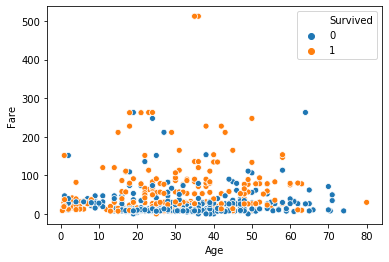

In [72]:
sns.scatterplot(x="Age", y="Fare", data=data, hue="Survived")
# plt.show()

Средний возраст погибших выше, верно? - ДА
30.62617924528302 28.343689655172415


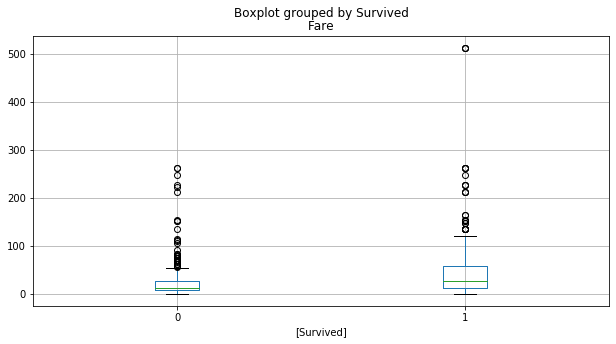

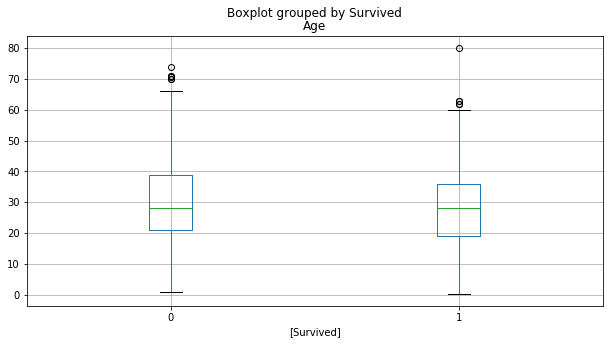

In [0]:
# Ваш код здесь
data.boxplot(column='Fare',  by=['Survived'], 
           figsize=(10,5))
data.boxplot(column='Age',  by=['Survived'], 
           figsize=(10,5))
# plt.show()

s = data.Age[data.Survived==1].mean()
n = data.Age[data.Survived==0].mean()
if s<n:
  print('Средний возраст погибших выше, верно? - ДА')
else:
  print('Средний возраст погибших выше, верно? - НЕТ')
print(n,s)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dd5a02940>,
      dtype=object)

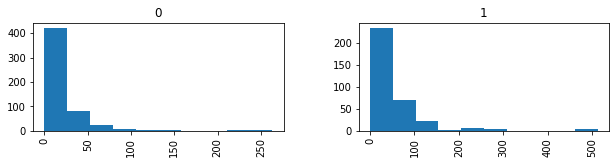

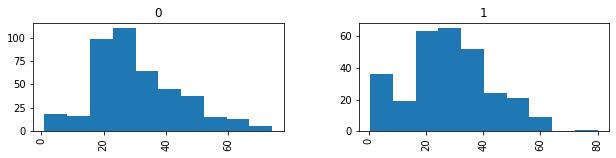

In [0]:
# Ваш код здесь
data.Fare.hist(data.Survived, figsize=(10,2))
data.Age.hist(data.Survived, figsize=(10,2))
# plt.show()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

В среднем мужчины 1-го класса старше 40 лет
Мужчины всех классов в среднем старше женщин того же класса
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса


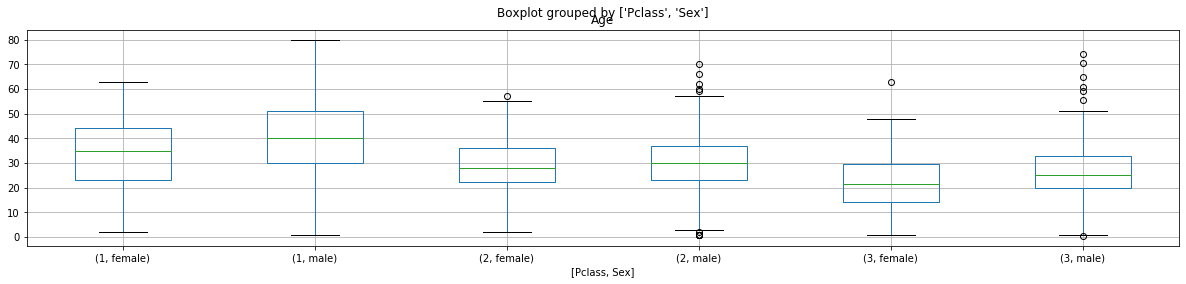

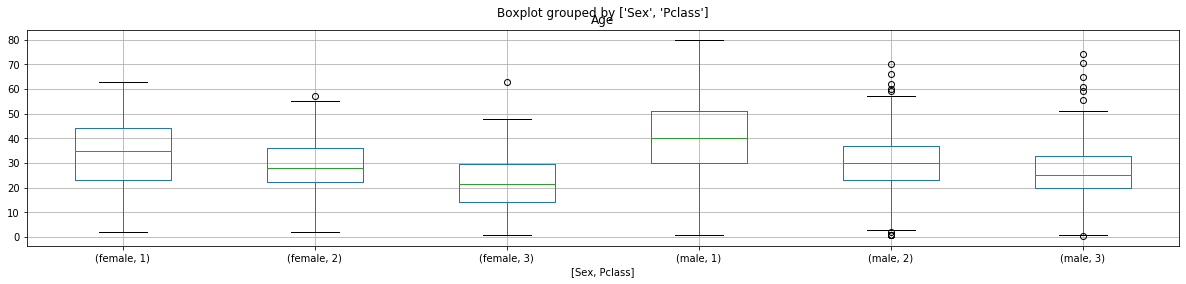

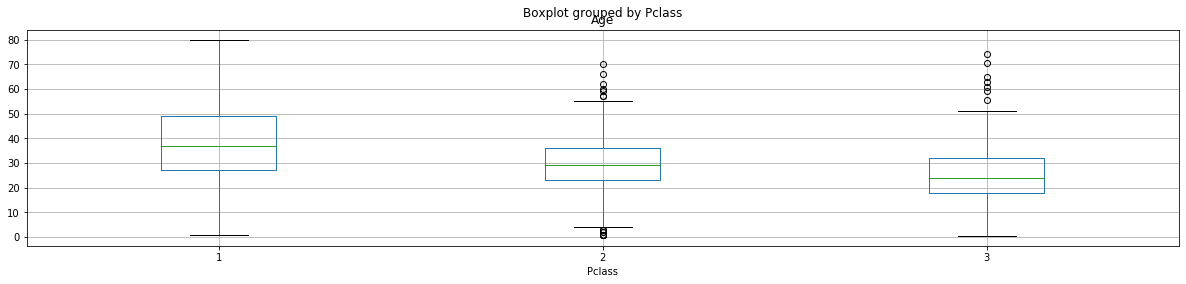

In [0]:
# Ваш код здесь
data.boxplot(column='Age',  by=['Pclass', 'Sex'], 
           figsize=(20,4))
data.boxplot(column='Age',  by=['Sex', 'Pclass'], 
           figsize=(20,4))
data.boxplot(column='Age',  by='Pclass', 
           figsize=(20,4))
# plt.show()
if (data.Age[(data.Sex=='male') & (data.Pclass==1)].mean()>40):
  print('В среднем мужчины 1-го класса старше 40 лет')
if (data.Age[(data.Sex=='female') & (data.Pclass==1)].mean()>40):
  print('В среднем женщины 1-го класса старше 40 лет')
k=1
t=1
for i in range(1,4):
  if (data.Age[(data.Sex=='female') & (data.Pclass==i)].mean()>=data.Age[(data.Sex=='male') & (data.Pclass==i)].mean()):
    k=0
  if i>1 and (data.Age[data.Pclass==i].mean()>=data.Age[data.Pclass==i-1].mean()):
    t=0
if k:
  print('Мужчины всех классов в среднем старше женщин того же класса')
if t:
  print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса')
